In [17]:
posting_list = [[' my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                    ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                    ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                    ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                    ['mr', 'licks', 'ate', 'my', 'steak', 'how', ' to', 'stop', 'him'],
                    ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

# 1代表侮辱性位子，0代表正常言论
class_vector = [0, 1, 0, 1, 0, 1]

In [ ]:
vocabulary_list = posting_list
return_vector = [0]*len(vocabulary_list)
return_vector

In [3]:
type(return_vector)

list

In [4]:
import numpy as np
a = np.zeros((1,6))
a

array([[ 0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
def load_data_set():
    """
    创建实验样本
    :return:    第一个变量是进行词条切分后的文档集合，第二个变量是类别标签的集合
    """
    posting_list = [[' my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
                    ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
                    ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
                    ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
                    ['mr', 'licks', 'ate', 'my', 'steak', 'how', ' to', 'stop', 'him'],
                    ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']]

    # 1代表侮辱性位子，0代表正常言论
    class_vector = [0, 1, 0, 1, 0, 1]

    return posting_list, class_vector


def create_vocabulary_list(data_set):
    """
    创建一个包含在所有文档中出现的不重复词的列表
    :param data_set:
    :return:
    """
    # 创建一个空集
    vocabulary_set = set([])
    for document in data_set:
        # 创建两个集合的并集
        vocabulary_set = vocabulary_set | set(document)
    return list(vocabulary_set)


def set_of_words_2_vector(vocabulary_list, input_set):
    """
    
    :param vocabulary_list:     词汇的列表
    :param input_set:           某个文档
    :return:                    文档向量，向量的每一个元素为1或0，分别表示词汇表中的单词在输入文档中是否出现
    """
    # 创建一个其中所含元素都为0的向量
    return_vector = [0]*len(vocabulary_list)
    for word in input_set:
        if word in vocabulary_list:
            return_vector[vocabulary_list.index(word)] = 1
        else:
            print('单词：%s 不在词汇表中！' %word)
    return return_vector

In [13]:
list_o_posts,list_classes = load_data_set()
my_vocab_list = create_vocabulary_list(list_o_posts)
my_vocab_list

['garbage',
 'take',
 'not',
 'park',
 'cute',
 'I',
 'how',
 'please',
 'food',
 'help',
 'him',
 'quit',
 'flea',
 'is',
 'so',
 'maybe',
 'stop',
 'buying',
 'worthless',
 ' to',
 'mr',
 'problems',
 'love',
 'my',
 'steak',
 'has',
 'licks',
 'to',
 'stupid',
 'dalmation',
 'ate',
 ' my',
 'dog',
 'posting']

## 伪代码
计算每个类别中的文档数目  
（例如上边的posting_list和class_vector，每个类别中的文档数目都应该是3？）  

1. 对每篇训练文档：  P(W0|类别1),P(W1|类别1),P(W2|类别1)...P(W|类别1)  
1.1 对每个类别：  
1.1.1 如果词条出现在文档中 -> 增加该词条的计数值  
1.1.2 增加所有词条的计数值  
1.2 对每个类别:  
1.2.1 对每个词条:  
1.2.1.1 将该词条的数目除以总词条数目得到条件概率  
1.3 返回每个类别的条件概率

In [18]:
def train_NB0(train_matrix:list, train_category):
    """

    :param train_matrix:
    :param train_category:
    :return:
    """
    # 训练文档的数目
    num_train_docs = len(train_matrix)
    num_words = len(train_matrix[0])

    # 分类为"侮辱性文档"的概率: 分类为"侮辱性文档"的文档数目，除以训练文档的总数目
    # train_category 为一维向量，只有0和1两种值，其中1代表侮辱性
    p_abusive = sum(train_category)/float(num_train_docs)

    # 初始化概率：
    p0_num = np.zeros(num_words)
    p1_num = np.zeros(num_words)

    # 这两个是充当分母的？
    p0_denom = 0.0
    p1_denom = 0.0

    for i in range(num_train_docs):
        if train_category[i] == 1:  # 类别为"侮辱"
            p1_num += train_matrix[i]
            p1_denom += sum(train_matrix[i])    # 训练文档中在词汇表中存在的单词数目
        else:
            p0_num += train_matrix[i]
            p0_denom += sum(train_matrix[i])    # 训练文档中在词汇表中存在的单词数目

    p1_vector = p1_num/p1_denom # 需要转为对数

    # 对每个元素做除法
    p0_vector = p0_num/p0_denom # 需要转为对数

    return p0_vector, p1_vector, p_abusive

In [20]:
# my_vocab_list
train_mat = []
for post_in_doc in list_o_posts:
    train_mat.append(set_of_words_2_vector(my_vocab_list, post_in_doc))
type(train_mat)

list

In [21]:
list_classes

[0, 1, 0, 1, 0, 1]

In [22]:
p0_v, p1_v, p_ab = train_NB0(train_mat, list_classes)

任意文档属于侮辱性文档的概率：

In [23]:
p_ab

0.5

在非侮辱性文档类别下词汇表中单词的出现概率

In [24]:
p0_v

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.04166667,
        0.04166667,  0.04166667,  0.04166667,  0.        ,  0.04166667,
        0.08333333,  0.        ,  0.04166667,  0.04166667,  0.04166667,
        0.        ,  0.04166667,  0.        ,  0.        ,  0.04166667,
        0.04166667,  0.04166667,  0.04166667,  0.08333333,  0.04166667,
        0.04166667,  0.04166667,  0.        ,  0.        ,  0.04166667,
        0.04166667,  0.04166667,  0.04166667,  0.        ])

在侮辱性文档类别下词汇表中单词的出现概率向量

In [25]:
p1_v

array([ 0.05263158,  0.05263158,  0.05263158,  0.05263158,  0.        ,
        0.        ,  0.        ,  0.        ,  0.05263158,  0.        ,
        0.05263158,  0.05263158,  0.        ,  0.        ,  0.        ,
        0.05263158,  0.05263158,  0.05263158,  0.10526316,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.05263158,  0.15789474,  0.        ,
        0.        ,  0.        ,  0.10526316,  0.05263158])

### 测试算法：根据现实情况修改分类器

1. 计算p(w0|1)p(w1|1)p(w2|1)...如果其中一个概率值为0，那么所有乘积也为0，需降低这种影响
2. 计算p(w0|1)p(w1|1)p(w2|1)...,由于大部分银子都非常小，所以这个乘积将会下溢出或者得不到正确的答案。一种解决办法是对乘积取自然数对数

In [27]:
def train_NB1(train_matrix, train_category):
    """
    train_NB0函数的改进
    :param train_matrix:    训练文档矩阵（准确来说只是python原生二维数组）
    :param train_category:  训练文档矩阵对应的分类（一维向量）
    :return: (在非侮辱性文档类别下词汇表中单词的出现概率向量, 在侮辱性文档类别下词汇表中单词的出现概率向量, 任意文档属于侮辱性文档的概率)
    """
    # 训练文档的数目
    num_train_docs = len(train_matrix)
    num_words = len(train_matrix[0])

    # 分类为"侮辱性文档"的概率: 分类为"侮辱性文档"的文档数目，除以训练文档的总数目
    # train_category 为一维向量，只有0和1两种值，其中1代表侮辱性
    p_abusive = sum(train_category) / float(num_train_docs)

    # 初始化概率：初始化为1而不是0
    # p0_num: 对于分类0，词汇表中单词的出现次数
    # p1_num: 对于分类1，词汇表中单词的出现次数
    p0_num = np.ones(num_words)
    p1_num = np.ones(num_words)

    # 这两个是充当分母，
    # TODO 为什么是2？为什么不是1或者其他数？
    p0_denom = 2.0
    p1_denom = 2.0

    for i in range(num_train_docs):
        if train_category[i] == 1:  # 类别为"侮辱"
            p1_num += train_matrix[i]
            p1_denom += sum(train_matrix[i])  # 训练文档中的单词同时也在词汇表中存在的数目
        else:
            p0_num += train_matrix[i]
            p0_denom += sum(train_matrix[i])  # 训练文档中的单词同时也在词汇表中存在的数目

    # 概率向量(转为对数)
    # 分母是，对于分类1（侮辱性文档），一共出现过多少个单词（所有文档中）
    # 分子是，对于分类1（侮辱性文档），词汇表中每个单词各自出现的次数（所有文档中）
    # 相除后，得到一个对于分类1（侮辱性文档），词汇表中每个单词出现的概率
    p1_vector = np.log(p1_num / p1_denom)

    # 对每个元素做除法
    p0_vector = np.log(p0_num / p0_denom)

    return p0_vector, p1_vector, p_abusive

In [ ]:
def classify_NB(vector_2_classify, p0_vector, p1_vector,p_class_1):
    """
    
    :param vector_2_classify:   要分类的向量 
    :param p0_vector:           在非侮辱性文档类别下词汇表中单词的出现概率向量
    :param p1_vector:           在侮辱性文档类别下词汇表中单词的出现概率向量
    :param p_class_1:           任意文档属于侮辱性文档的概率
    :return: 
    """
    p1 = sum(vector_2_classify * p1_vector) + np.log(p_class_1)
    p0 = sum(vector_2_classify * p0_vector) + np.log(1.0 - p_class_1)
    if p1 > p0:
        return 1
    else:
        return 0

## 朴素贝叶斯分类函数

list_o_posts 训练集：文档列表  
list_classes 训练集对应的分类

In [31]:
list_o_posts, list_classes

([[' my', 'dog', 'has', 'flea', 'problems', 'help', 'please'],
  ['maybe', 'not', 'take', 'him', 'to', 'dog', 'park', 'stupid'],
  ['my', 'dalmation', 'is', 'so', 'cute', 'I', 'love', 'him'],
  ['stop', 'posting', 'stupid', 'worthless', 'garbage'],
  ['mr', 'licks', 'ate', 'my', 'steak', 'how', ' to', 'stop', 'him'],
  ['quit', 'buying', 'worthless', 'dog', 'food', 'stupid']],
 [0, 1, 0, 1, 0, 1])

**my_vocab_list**：根据list_o_posts中训练集所有文档，抽取所有曾出现的单词，得出的词汇列表  

**train_mat**：list_o_posts中训练集文档，原来是多组组由若干单词组成的向量，现在把它转换为若干组由(1,0)组成的向量，遍历my_vocab_list中的单词，如果该单词在文档中出现，则标记为1，没出现则标记为0

In [34]:
my_vocab_list, train_mat

(['garbage',
  'take',
  'not',
  'park',
  'cute',
  'I',
  'how',
  'please',
  'food',
  'help',
  'him',
  'quit',
  'flea',
  'is',
  'so',
  'maybe',
  'stop',
  'buying',
  'worthless',
  ' to',
  'mr',
  'problems',
  'love',
  'my',
  'steak',
  'has',
  'licks',
  'to',
  'stupid',
  'dalmation',
  'ate',
  ' my',
  'dog',
  'posting'],
 [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   1,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0],
  [0,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   1,
   0],
  [0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   0,
   0,
   0],
  [1,
   0,
   0,
   0,
   0,
   0,


train_mat，list_classes的类型为python原生的多维数组，现在把它们转换为numpy中array类型的变量：train_array，list_classes_array


In [37]:
train_array = np.array(train_mat)
list_classes_array = np.array(list_classes)

**prob_0_vector**：训练集中类别为"非侮辱性"的文档中，词汇表中每个单词的出现概率（组成一个一维向量）  
暂且理解为公式中的p(w|分类0)

**prob_1_vector**：训练集中类别为"侮辱性"的文档中，词汇表中每个单词的出现概率（组成一个一维向量）  
暂且理解为公式中的p(w|分类1)

**prob_abusive**：训练集中类别为"侮辱性"文档的出现概率 


In [38]:
prob_0_vector, prob_1_vector, prob_abusive = train_NB1(train_array, list_classes_array)


In [62]:
# 测试集 文档列表
test_entry = ['love', 'my', 'dalmation']
# test_entry = ['stupid','garbage']
# 转换测试集的格式，转化为词汇表中单词是否出现组成的向量
test_mat = set_of_words_2_vector(my_vocab_list, test_entry)
# 把转换后的测试集，再转为numpy中的array
test_doc_array = np.array(test_mat)

计算测试集（只有1条数据）的概率

**这公式tmd怎么来的？！**

In [63]:
# 测试集的那条数据，类别可能为"侮辱性"的概率
test_prob_1 = sum(test_doc_array * prob_1_vector) + np.log(prob_abusive)

# 测试集的那条数据，类别可能为"非侮辱性"的概率
test_prob_0 = sum(test_doc_array * prob_0_vector) + np.log(1.0 - prob_abusive)


In [64]:
test_prob_1, test_prob_0

(-9.8267144937302149, -7.9825301448363906)

## 上边的都是词集模型，现在进化一下，改为词袋模型

In [ ]:
def bag_of_words_2_vector(vocabulary_list, input_set):
    """
    
    :param vocabulary_list:     词汇的列表
    :param input_set:           某个文档
    :return:                    文档向量，向量的每一个元素整数，表示单词出现次数
    """
    # 创建一个其中所含元素都为0的向量
    return_vector = [0]*len(vocabulary_list)
    for word in input_set:
        if word in vocabulary_list:
            return_vector[vocabulary_list.index(word)] += 1
        else:
            print('单词：%s 不在词汇表中！' %word)
    return return_vector

## 乱写乱画  

最终目的：求p(分类1|w),p(分类2|w)  

由贝叶斯公式可知：  
【向量为w 与 分类为1 同时发生的概率】 = p(w)\*p(分类1) = p(w)\*p(分类1|w) = p(w|分类1) \* p(分类1)  

因此p(分类1|w) = p(w|分类1) \* p(分类1) / p(w)  

而因为w是由w0,w1,w2,w3....组成的一组向量，由此可得  
p(w) = p(w0) \* p(w1) \* p(w2) \* p(w3) ...  
p(w|分类1) = p(w0|分类1) \* p(w1|分类1) \* p(w2|分类1) \* p(w3|分类1) ...


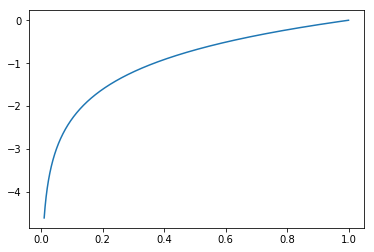

In [61]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot

x_ = np.linspace(0.01, 1, 10000)
y_ = np.log(x_)

plt.plot(x_,y_)
plt.show()